In [1]:
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme="onedork", context="notebook", ticks=True, grid=True)

import numpy as np
import itertools
import h5py
import os
import sys
import glob

import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import pandas as pd
import tikzplotlib

# from tqdm import tqdm
from tqdm.notebook import tqdm_notebook as tqdm

import helper.circular

In [2]:
df = pd.read_pickle(os.path.join("output/test/voxel_size_post_1.pkl"))
df = df[df.f1_rot == 0]
df['epa_dir_diff'] = np.rad2deg(df['epa_dir_diff'])
# df['epa_trans_diff_rel'] = df['epa_trans_diff']
# df['epa_ret_diff_rel'] = df['epa_ret_diff']

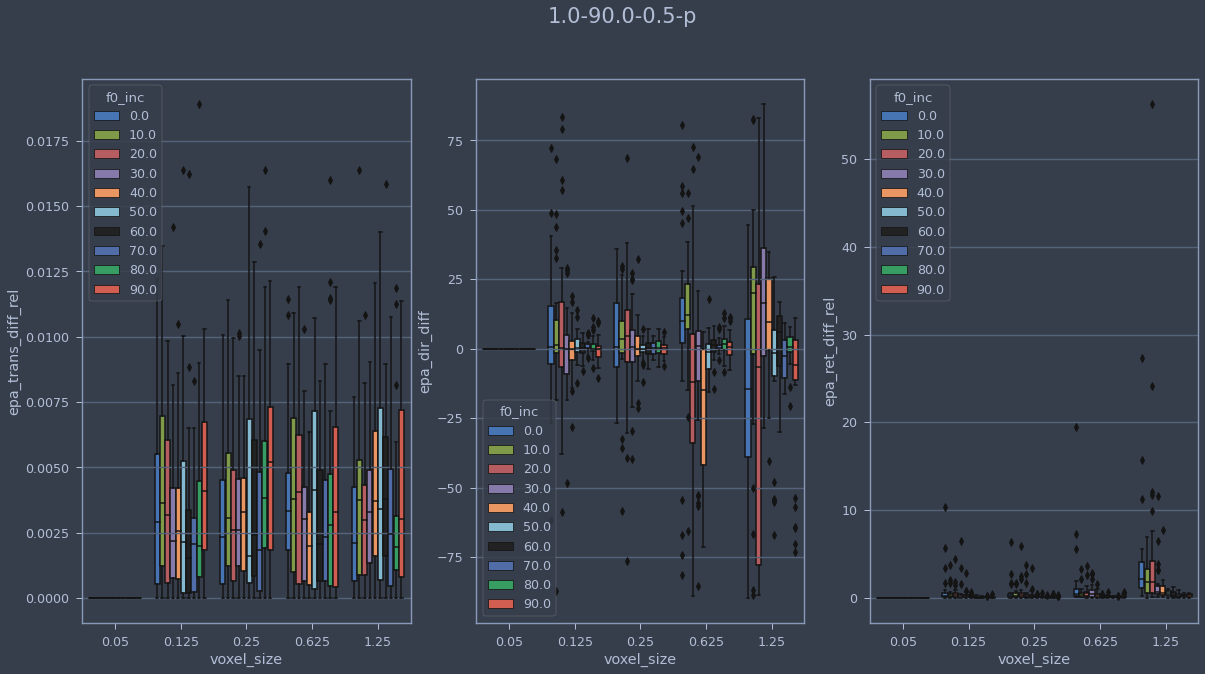

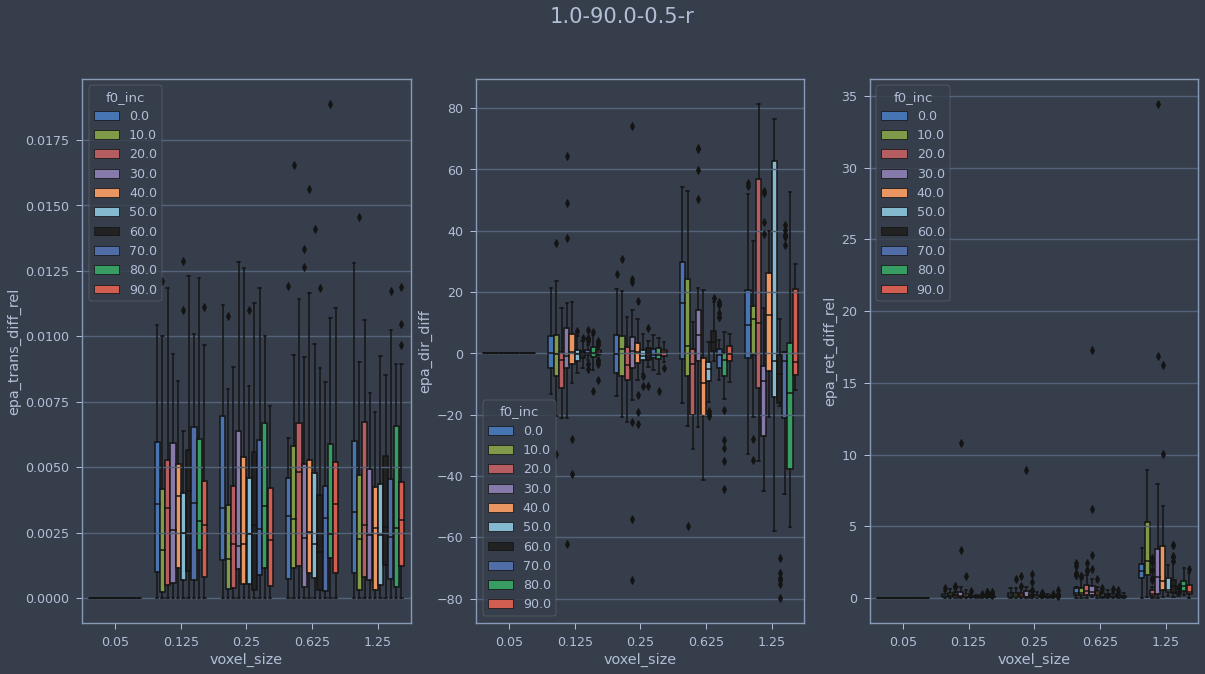

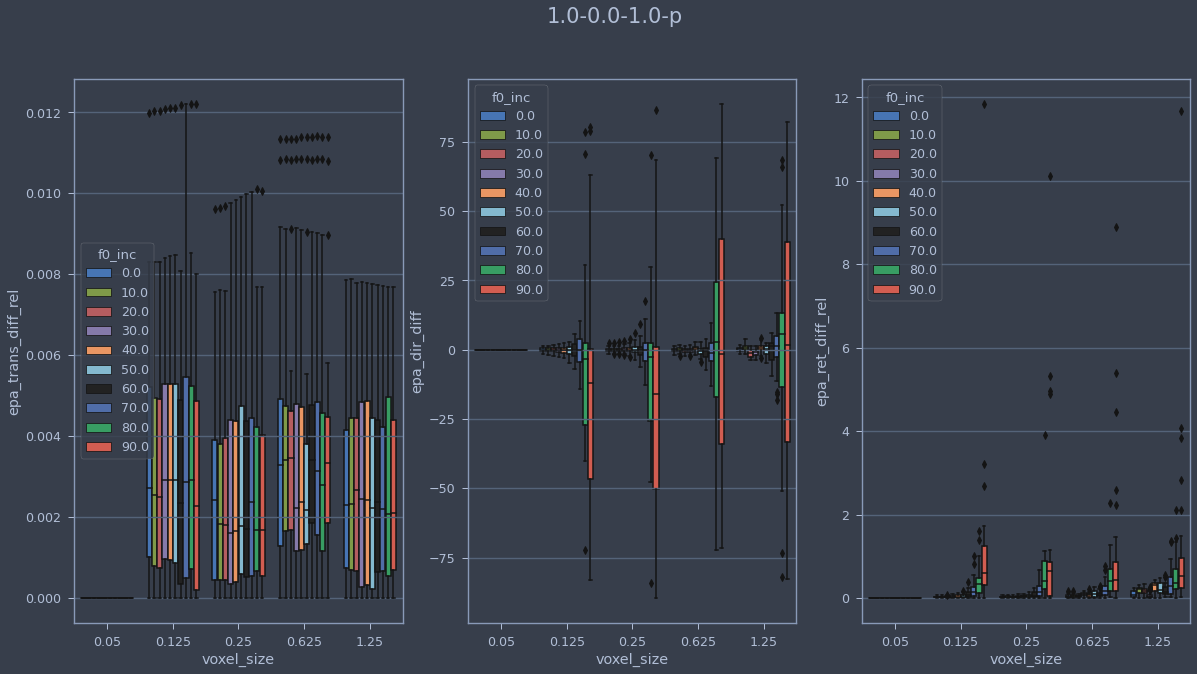

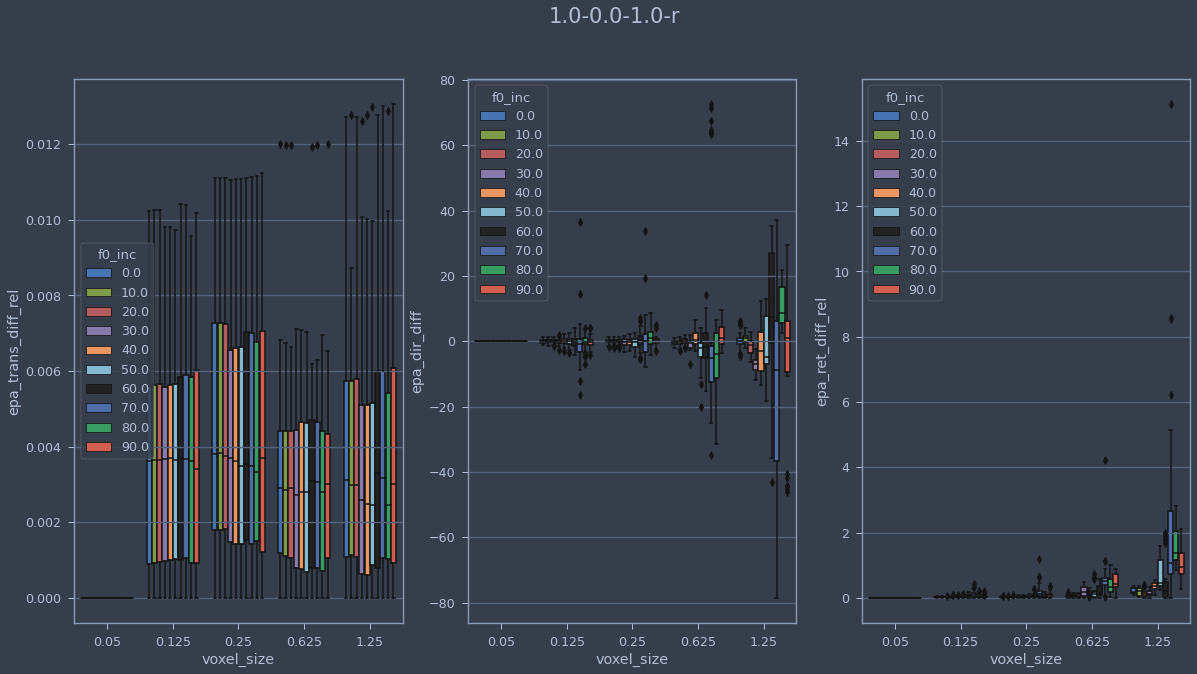

In [10]:

parameters = list(df[["radius", "omega", "psi", "model"]].drop_duplicates().iterrows())

for _, p in parameters:
    radius = p['radius']
    omega = p['omega']
    psi = p['psi']
    model = p['model']
    sub = (df.radius == radius) & (df.omega == omega) & (df.psi == psi) & (df.model == model)
    
    string = [str(elm) for elm in p]
    string = '-'.join(string)
#     print(string)
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 10))
    fig.suptitle(string, fontsize=21)
    
    sns.boxplot(x="voxel_size", y="epa_trans_diff_rel", hue='f0_inc', data=df[sub], ax=axs[0])
    sns.boxplot(x="voxel_size", y="epa_dir_diff", hue='f0_inc', data=df[sub], ax=axs[1])
    sns.boxplot(x="voxel_size", y="epa_ret_diff_rel", hue='f0_inc', data=df[sub], ax=axs[2])
